In [1]:
import pandas as pd
from tqdm import tqdm

# Read Consonants and Vowels

## Hardcoded vowels and consonants

In [6]:
from collections import OrderedDict

vowels = OrderedDict([
('ँ','n'),
('ं','n'),
('ः','a'),
('अ','a'), 
('आ','aa'), 
('इ','i'), 
('ई','ee'), 
('उ','u'), 
('ऊ','oo'), 
('ऋ','ri'), 
('ए','e'), 
('ऐ','ae'), 
('ओ','o'), 
('औ','au'), 
('ा','a'), 
('ि','i'), 
('ी','i'), 
('ु','u'), 
('ू','oo'), 
('ृ','ri'), 
('े','e'), 
('ै','ai'), 
('ो','o'), 
('ौ','au')
])

consonants = OrderedDict([
('क','k'), 
('ख','kh'), 
('ग','g'), 
('घ','gh'), 
('ङ','ng'),

('च','ch'), 
('छ','chh'), 
('ज','j'), 
('ज़','z'),
('ज़','z'), #these two are very different, see them in unicode by 'ज़'.encode('utf-8'). You'll see.
('झ','jh'), 
('ञ','nj'), 

('ट','t'), 
('ठ','th'), 
('ड','d'), 
('ड़','r'),
('ड़','r'), #these two are very different, see them in unicode by 'ड़'.encode('utf-8'). You'll see.
('ढ','dh'), 
('ण','n'), 

('त','t'), 
('थ','th'), 
('द','d'), 
('ध','dh'), 
('न','n'), 

('प','p'), 
('फ','ph'), 
('फ़','f'),
('फ़','f'), #these two फ़ are very different, see them in unicode by 'फ़'.encode('utf-8'). You'll see.
('ब','b'), 
('भ','bh'), 
('म','m'), 

('य','y'), 
('र','r'), 
('ल','l'), 
('व','v'), 
('श','sh'), 

('ष','sh'), 
('स','s'), 
('ह','h'),
('क्ष','ksh'),
('त्र','tr'),
('ज्ञ','gy')])

# Transilirate Devanagari(Hindi) to Roman/Latin(English Alphabets)

In [7]:
def convert_from_devanagiri_to_roman(sentences, vowels, consonants):
    """
    Function that takes Hindi Senteces (Devanagari Script Sentences) and convert them
    into Roman/Latin Script Representations. 
    i,e how would we write the sentences using english alphabets ?
    """
    output = []
    for x in tqdm(sentences):
        str1 = ""
        for y in x.split():
            for i in range(len(y)):
                if (i+1<len(y) and y[i+1].strip()==' ़'.strip()):
                    c = y[i]+y[i+1]
                    p=2
                else:
                    c = y[i]
                    p=1
                if (c in vowels.keys()):
                    str1 = str1 + vowels[c]
                elif (c in consonants.keys()):
                    if(i+p<len(y) and y[i+p] in consonants.keys()):
                        if ((c=='झ' and i!=0) or (i!=0 and i+p+1<len(y) and y[i+p+1] in vowels.keys())): # add 'a' after 'jh', only if झ appears in the starting of the word
                            str1 = str1 + consonants[c]
                        else:
                            str1 = str1 + consonants[c]+'a'
                    else:
                        str1 = str1 + consonants[c]
                elif y[i] in ['\n','\t',' ','!',',','।','-',':','\\','_','?'] or c.isalnum():
                    str1 = str1 + c.replace('।','.')
            str1 = str1 + " "
        output.append(str1.strip())

    return output
sentences = ['मेरा नाम हरि है'] # list of sentences
print(convert_from_devanagiri_to_roman(sentences, vowels, consonants))

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 999.36it/s]

['mera nam hari hai']


# Read Hindi English Translation Dataset

- download input dataset from here https://www.kaggle.com/datasets/vaibhavkumar11/hindi-english-parallel-corpus

In [8]:
df = pd.read_csv('./hindi_english_parallel.csv')
df = df[~df.isnull().any(axis=1)]

In [9]:
df.head()

,hindi,english
0,अपने अनुप्रयोग को पहुंचनीयता व्यायाम का लाभ दें,Give your application an accessibility workout
1,एक्सेर्साइसर पहुंचनीयता अन्वेषक,Accerciser Accessibility Explorer
2,निचले पटल के लिए डिफोल्ट प्लग-इन खाका,The default plugin layout for the bottom panel
3,ऊपरी पटल के लिए डिफोल्ट प्लग-इन खाका,The default plugin layout for the top panel
4,उन प्लग-इनों की सूची जिन्हें डिफोल्ट रूप से नि...,A list of plugins that are disabled by default


## Transilerate Hindi Texts

In [10]:
df['transilerated_hindi'] = convert_from_devanagiri_to_roman(list(df['hindi']), vowels, consonants)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████| 1555727/1555727 [02:06<00:00, 12330.10it/s]


In [11]:
df.head()

,hindi,english,transilerated_hindi
0,अपने अनुप्रयोग को पहुंचनीयता व्यायाम का लाभ दें,Give your application an accessibility workout,apne anupryog ko pahunchniyta vyayam ka labh den
1,एक्सेर्साइसर पहुंचनीयता अन्वेषक,Accerciser Accessibility Explorer,eksersaisar pahunchniyta anveshak
2,निचले पटल के लिए डिफोल्ट प्लग-इन खाका,The default plugin layout for the bottom panel,nichle patal ke lie dipholt plag-in khaka
3,ऊपरी पटल के लिए डिफोल्ट प्लग-इन खाका,The default plugin layout for the top panel,oopri patal ke lie dipholt plag-in khaka
4,उन प्लग-इनों की सूची जिन्हें डिफोल्ट रूप से नि...,A list of plugins that are disabled by default,un plag-inon ki soochi jinhen dipholt roop se ...


## Prepare Train Dataset

In [12]:
english_df = pd.DataFrame(list(df['english']), columns = ['text'])
english_df['label'] = 'english'
hindi_df = pd.DataFrame(list(df['transilerated_hindi']), columns = ['text'])
hindi_df['label'] = 'hindi'
train_df = pd.concat([english_df, hindi_df], ignore_index=True)

In [62]:
train_df.head()

,text,label
0,Give your application an accessibility workout,english
1,Accerciser Accessibility Explorer,english
2,The default plugin layout for the bottom panel,english
3,The default plugin layout for the top panel,english
4,A list of plugins that are disabled by default,english


In [63]:
train_df.tail()

,text,label
3111449,Members making oathaffirmation,hindi
3111450,spashtikaranjhan is updhara ke adhin hani aur ...,hindi
3111451,mainne gaur kiya hai ki yah n keval apne mahat...,hindi
3111452,unhonne mere samaksh jo pradarshan kiya usmen ...,hindi
3111453,khady aur jal suraksha paryavaran ki drishti s...,hindi


## Import necessary libraries

In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

## Split Dataset into train and test

In [17]:
X_train, X_test, y_train, y_test = train_test_split(train_df['text'], train_df['label'],  test_size=0.2, random_state=42, stratify=train_df['label'])

## Vectorize Text Data using TF-IDF Vectorizer

In [38]:
vectorizer = TfidfVectorizer()
X_train_vectors = vectorizer.fit_transform(X_train)
X_test_vectors = vectorizer.transform(X_test)
print(X_train_vectors.shape)

(2489163, 431015)


## Define and Fit a simple Logistic Algorithm

In [39]:
clf = LogisticRegression()
clf.fit(X_train_vectors, y_train)

c:\users\laxmi.n.yelesetty\virtualenvironments\careerchoice\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

## Checkout Accuracy

In [40]:
accuracy = clf.score(X_test_vectors, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.9790853475303355


## Look at Few Predictions

In [61]:
print("Predictions for Hindi\n",'#'*100)
new_hindi_texts = ['मे वहाँ खेल रहा हुाा', 'आप बहुत सुन्दर हो']
transilerated_text = convert_from_devanagiri_to_roman(new_hindi_texts, vowels, consonants)
print(f"Given Hindi Texts -> {new_hindi_texts} , Transilerated Texts -> {transilerated_text}")
new_text_vectors = vectorizer.transform(transilerated_text)
prediction = clf.predict(new_text_vectors)
print("Prediction:", prediction)
print("\nPredictions for English\n",'#'*100)
english_text = ['I am feeling so sad today', 'This is not the way tyou speak to your superiors']
print(f"Input English Texts - {english_text}")
new_text_vectors = vectorizer.transform(english_text)
prediction = clf.predict(new_text_vectors)
print("Prediction:", prediction)

Predictions for Hindi
 ####################################################################################################


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<?, ?it/s]

Given Hindi Texts -> ['मे वहाँ खेल रहा हुाा', 'आप बहुत सुन्दर हो'] , Transilerated Text -> ['me vahan khel raha huaa', 'aap bahut sundar ho']
Prediction: ['hindi' 'hindi']

Predictions for English
 ####################################################################################################
Input English Texts - ['I am feeling so sad today', 'This is not the way tyou speak to your superiors']
Prediction: ['english' 'english']


## Confusion Matrix

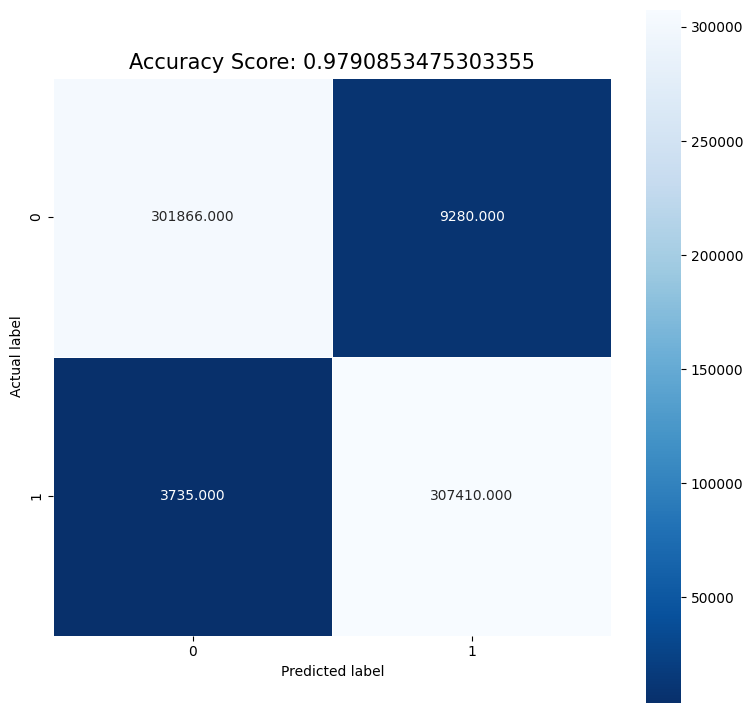

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns
y_pred = clf.predict(X_test_vectors)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(accuracy)
plt.title(all_sample_title, size = 15);